<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-07-11 18:08:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.7MB/s    in 2.5s    

2025-07-11 18:08:12 (60.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head(30)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


In [8]:
print(df.columns.to_list())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


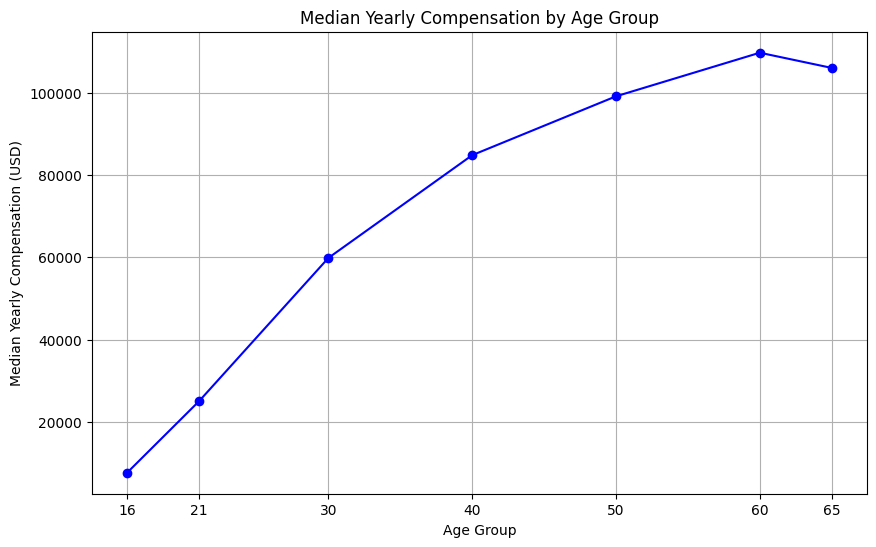

In [12]:
import numpy as np
# Example: convert age strings like "30-34 years old" or "Under 18 years" into numeric average age
def parse_age(age_str):
    if pd.isna(age_str):
        return np.nan
    age_str = age_str.lower().strip()
    if 'under' in age_str:
        # e.g. "Under 18 years"
        return 16  # or any value representing "under 18"
    elif 'over' in age_str:
        # e.g. "Over 60 years"
        return 65  # or any value representing "over 60"
    else:
        # e.g. "30-34 years old"
        parts = age_str.split('-')
        if len(parts) == 2:
            try:
                low = int(''.join(filter(str.isdigit, parts[0])))
                high = int(''.join(filter(str.isdigit, parts[1])))
                return (low + high) / 2
            except:
                return np.nan
        else:
            # fallback for any other format
            try:
                return int(''.join(filter(str.isdigit, age_str)))
            except:
                return np.nan

# Create a new column AgeNum with numeric ages
df['AgeNum'] = df['Age'].apply(parse_age)

# Drop rows with missing AgeNum or ConvertedCompYearly
df_filtered = df.dropna(subset=['AgeNum', 'ConvertedCompYearly']).copy()

# Round AgeNum to nearest integer for grouping
df_filtered['AgeGroup'] = df_filtered['AgeNum'].round().astype(int)

# Calculate median compensation per age group
median_comp = df_filtered.groupby('AgeGroup')['ConvertedCompYearly'].median()

# Plot line chart
plt.figure(figsize=(10,6))
median_comp.plot(kind='line', marker='o', color='blue')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.grid(True)
plt.xticks(median_comp.index)  # show all age groups on x-axis

plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


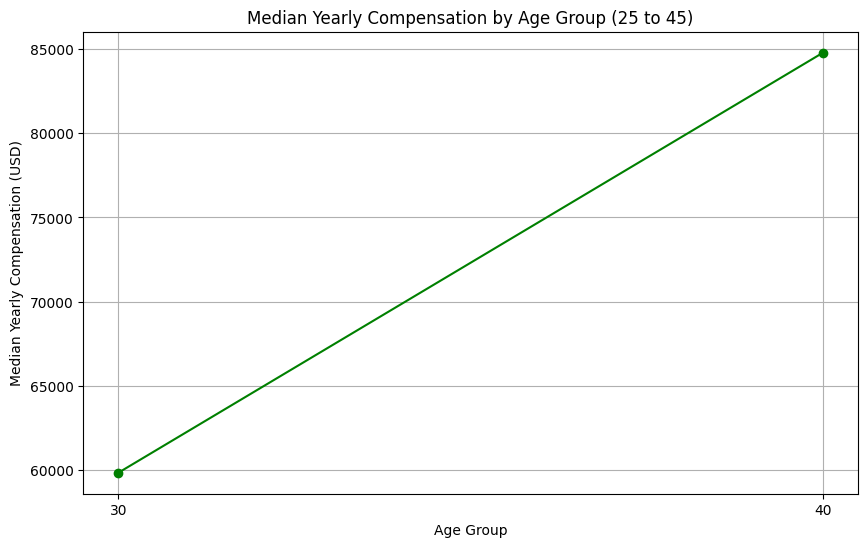

In [13]:
# Function to parse Age string to numeric average age
def parse_age(age_str):
    if pd.isna(age_str):
        return np.nan
    age_str = age_str.lower().strip()
    if 'under' in age_str:
        return 16
    elif 'over' in age_str:
        return 65
    else:
        parts = age_str.split('-')
        if len(parts) == 2:
            try:
                low = int(''.join(filter(str.isdigit, parts[0])))
                high = int(''.join(filter(str.isdigit, parts[1])))
                return (low + high) / 2
            except:
                return np.nan
        else:
            try:
                return int(''.join(filter(str.isdigit, age_str)))
            except:
                return np.nan

# Add numeric age column
df['AgeNum'] = df['Age'].apply(parse_age)

# Filter rows with valid AgeNum and compensation
df_filtered = df.dropna(subset=['AgeNum', 'ConvertedCompYearly']).copy()

# Filter for age range 25 to 45
df_filtered = df_filtered[(df_filtered['AgeNum'] >= 25) & (df_filtered['AgeNum'] <= 45)]

# Round AgeNum to nearest integer to create AgeGroup
df_filtered['AgeGroup'] = df_filtered['AgeNum'].round().astype(int)

# Calculate median compensation by age group
median_comp = df_filtered.groupby('AgeGroup')['ConvertedCompYearly'].median()

# Plot line chart
plt.figure(figsize=(10,6))
median_comp.plot(kind='line', marker='o', color='green')

plt.title('Median Yearly Compensation by Age Group (25 to 45)')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.grid(True)
plt.xticks(median_comp.index)

plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


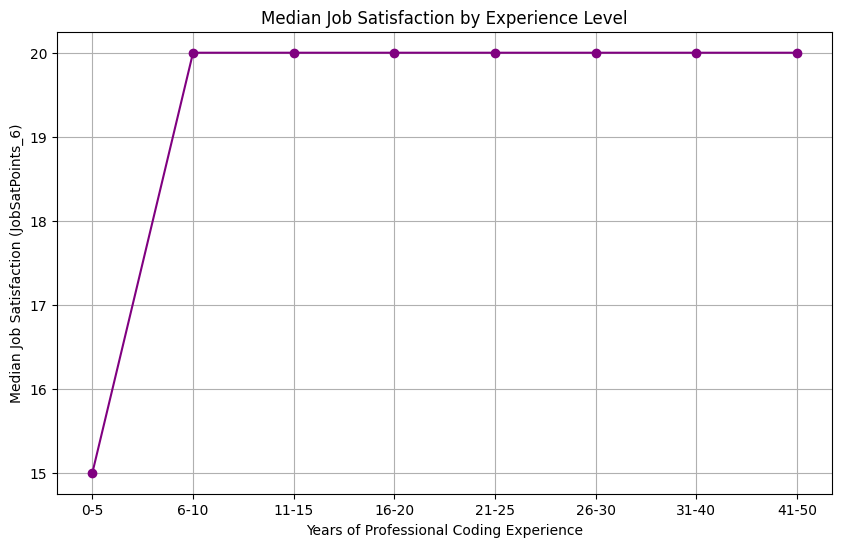

In [15]:
# If YearsCodePro is string ranges like '3-5 years', convert to numeric approximate years
def parse_experience(exp):
    if pd.isna(exp):
        return np.nan
    if isinstance(exp, (int, float)):
        return exp
    exp = exp.lower().strip()
    if exp in ['less than 1 year', '<1 year', 'less than one year']:
        return 0.5
    elif exp == 'more than 50 years':
        return 50
    else:
        parts = [s for s in exp.split() if s[0].isdigit() or s[0] == '<' or s[0] == '>']
        # Try to parse numeric parts
        nums = []
        for part in parts:
            try:
                nums.append(float(part.replace('<','').replace('>','')))
            except:
                pass
        if len(nums) == 1:
            return nums[0]
        elif len(nums) >= 2:
            return np.mean(nums[:2])
        else:
            return np.nan

# Apply the parsing function to YearsCodePro column
df['YearsCodeProNum'] = df['YearsCodePro'].apply(parse_experience)

# Drop rows with missing YearsCodeProNum or JobSatPoints_6
df_filtered = df.dropna(subset=['YearsCodeProNum', 'JobSatPoints_6']).copy()

# Bin the experience into buckets, e.g. every 5 years
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '41-50', '51-60']
df_filtered['ExperienceGroup'] = pd.cut(df_filtered['YearsCodeProNum'], bins=bins, labels=labels, right=True)

# Calculate median job satisfaction per experience group
median_jobsat = df_filtered.groupby('ExperienceGroup', observed=True)['JobSatPoints_6'].median()

# Plot line chart
plt.figure(figsize=(10,6))
median_jobsat.plot(kind='line', marker='o', color='purple')

plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


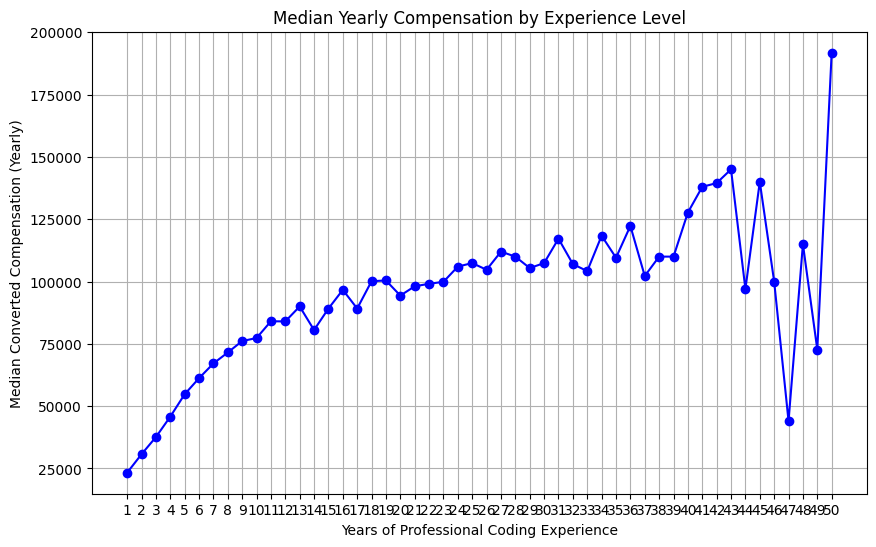

In [16]:
# Step 1: Clean data - drop rows missing experience or compensation
df_filtered = df.dropna(subset=['YearsCodePro', 'ConvertedCompYearly']).copy()

# Step 2: Convert YearsCodePro to numeric if it's not already (handle ranges if needed)
# For example, if 'YearsCodePro' is string like '3-5 years', you might need to extract numbers.
# Here, we assume it's already numeric or float. If not, you can preprocess accordingly.

df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['YearsCodePro'])

# Optional: Group experience by integer years for easier grouping
df_filtered['ExperienceGroup'] = df_filtered['YearsCodePro'].round().astype(int)

# Step 3: Calculate median compensation per experience group
median_compensation = df_filtered.groupby('ExperienceGroup')['ConvertedCompYearly'].median()

# Step 4: Plot the line chart
plt.figure(figsize=(10,6))
median_compensation.plot(kind='line', marker='o', color='blue')

plt.title('Median Yearly Compensation by Experience Level')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.grid(True)
plt.xticks(median_compensation.index)  # Show all experience years on x-axis

plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


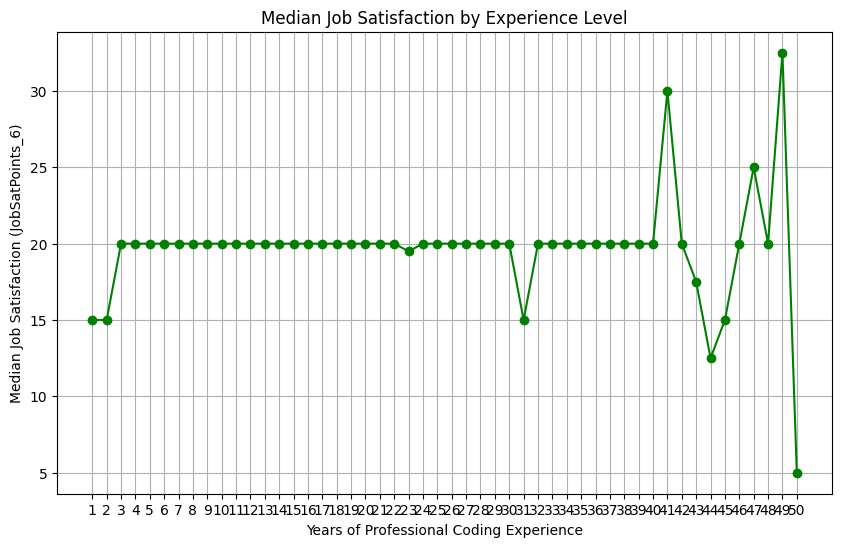

In [17]:
# Filter to keep rows with non-null YearsCodePro and JobSatPoints_6
df_filtered = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6']).copy()

# Convert YearsCodePro to numeric (if needed)
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['YearsCodePro'])

# Group YearsCodePro by rounded integers for clearer grouping
df_filtered['ExperienceGroup'] = df_filtered['YearsCodePro'].round().astype(int)

# Calculate median JobSatPoints_6 per experience group
median_jobsat = df_filtered.groupby('ExperienceGroup')['JobSatPoints_6'].median()

# Plotting the line chart
plt.figure(figsize=(10,6))
median_jobsat.plot(kind='line', marker='o', color='green')

plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.xticks(median_jobsat.index)  # Show all experience years on x-axis

plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
